In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gensim.corpora as corpora
import gensim
import pickle

from ast import literal_eval
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from wordcloud import WordCloud


In [2]:
data = pd.read_csv('reduced_comments_vk.csv')

In [3]:
data.head()

Unnamed: 0 audio     author              comment_id                 date  \
0           9   NaN  146608415  52228413_282387_282503  2019-01-01 17:43:48   
1         103   NaN  197130573  52228413_282259_282287  2018-12-31 13:47:29   
2         107   NaN  -52228413  52228413_282158_282162  2018-12-30 21:04:56   
3         130   NaN  197130573  52228413_282158_282211  2018-12-30 23:04:28   
4         190   NaN  208434900  52228413_282010_282031  2018-12-29 17:18:25   

                                          dirty_text  \
0  [id415608045|Иван],\nВ который раз, весь мир л...   
1  С Наступающим!. Пусть старый год уходя оставит...   
2  Автор музыки и слов - Дмитрий Митькин.\n\nВ ко...   
3  Ура!!!🔥🔥🔥🔥🔥🔥🔥🔥 Предновогодняя премьера от непо...   
4  Легко. "Аминь"- лучший клип ГВ за последнее вр...   

                                 emoji  likes link music_style performer  \
0                                  NaN      1  NaN     estrada      лепс   
1                                  NaN      2  NaN     estrada      лепс   
2                                  NaN     29  NaN     estrada      лепс   
3  🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥👍👍👍👍👍👍👍👍💪💪💪💪💪💪💪💪🔥🔥😎😎😎      6  NaN     estrada      лепс   
4                                  NaN      4  NaN     estrada      лепс   

   stickers                                               text video  \
0       NaN  id415608045 иван который весь мир лететь чужое...   NaN   
1       NaN  наступать пусть старый год уходить оставить ве...   NaN   
2       NaN  автор музыка слово дмитрий митькина который ве...   NaN   
3       NaN  ура предновогодний премьера неподражаемый непр...   NaN   
4       NaN  легко аминь хороший клип последний время полны...   NaN   

                                            text_bow  comment_len  
0  ['id415608045', 'иван', 'который', 'весь', 'ми...         79.0  
1  ['наступать', 'пусть', 'старый', 'год', 'уходи...         42.0  
2  ['автор', 'музыка', 'слово', 'дмитрий', 'митьк...         82.0  
3  ['ура', 'предновогодний', 'премьера', 'неподра...         43.0  
4  ['легко', 'аминь', 'хороший', 'клип', 'последн...         70.0

In [4]:
bag_of_words = data.text_bow.apply(literal_eval)
bigram = Phraser(Phrases(bag_of_words, min_count=5, threshold=100)) 
data_words_bigrams = [bigram[w] for w in bag_of_words]

id2word = corpora.Dictionary(data_words_bigrams)
id2word.filter_extremes(no_below=3, no_above=0.4, keep_n=3*10**6)

corpus = [id2word.doc2bow(text) for text in data_words_bigrams]

In [10]:
lda_model = gensim.models.ldamulticore.LdaMulticore(
        workers=4,
        eval_every=20,
        corpus=corpus,
        id2word=id2word,
        num_topics=30, 
        random_state=100,
        chunksize=100,
        passes=5,
        per_word_topics=True)

In [11]:
topics = lda_model.show_topics(num_topics=30, num_words=100,formatted=False)

In [12]:
def plotWordCloud(topic_number):
    """
        Строит визуализацию слов на основе текстов топиков
    """
    # получаем частоты и слова топика
    
    text = dict(topics[topic_number][1])
    
    # строим облако слов
    wordcloud = WordCloud(background_color="white", max_words=100, width=900, height=900, collocations=False)
    wordcloud = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(15, 10))
    plt.title("Топик номер {}".format(topic_number))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

/home/tay/ml-2019-08/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


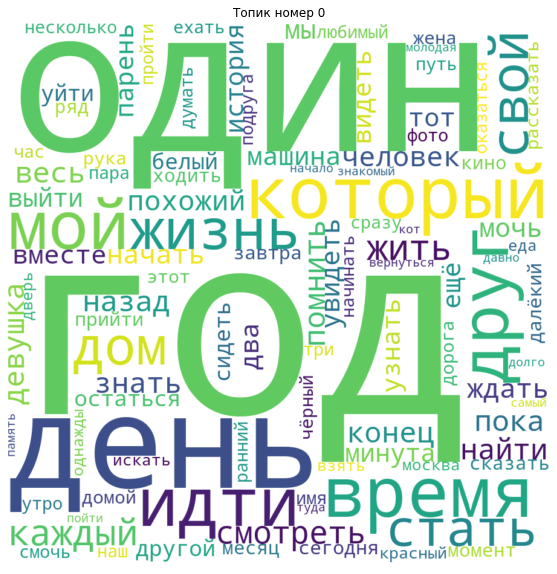

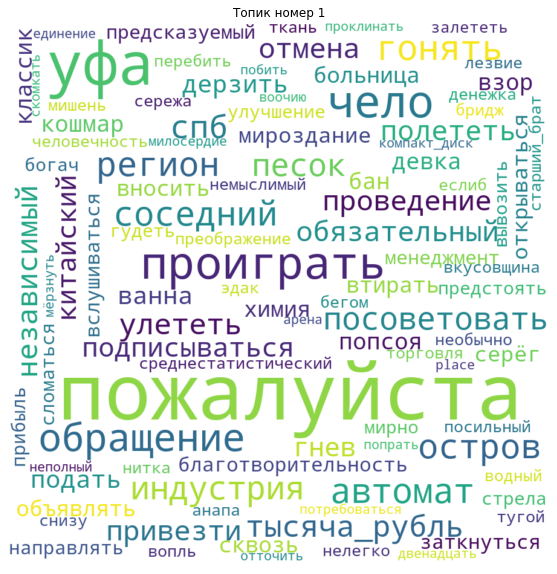

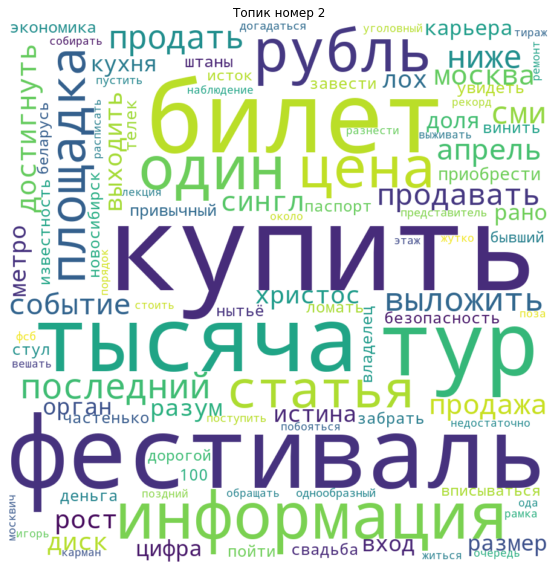

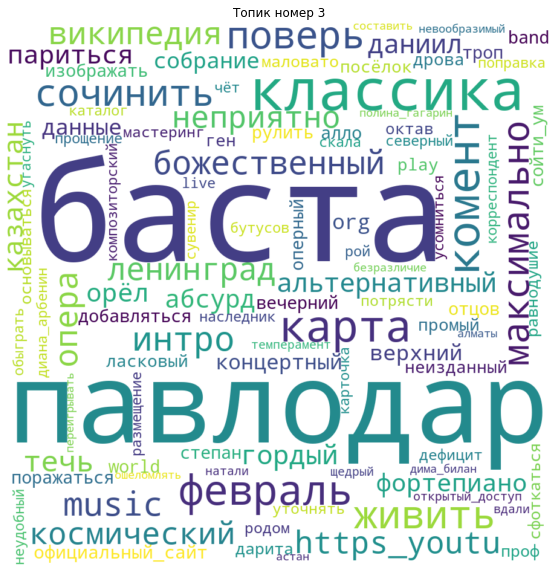

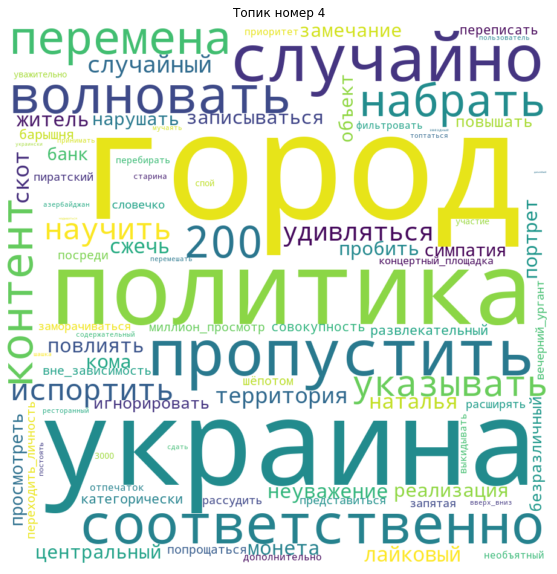

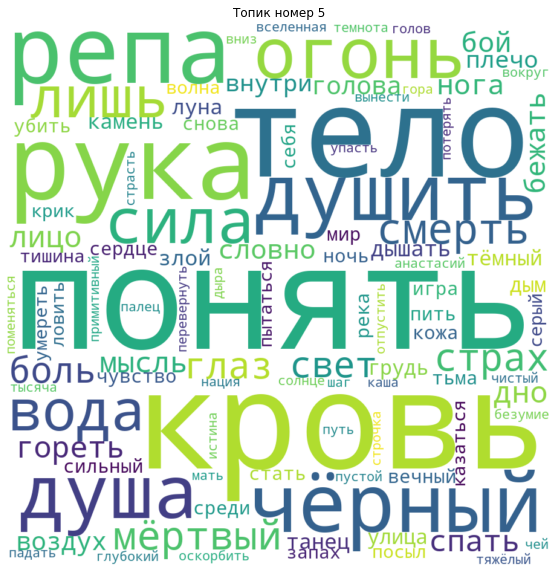

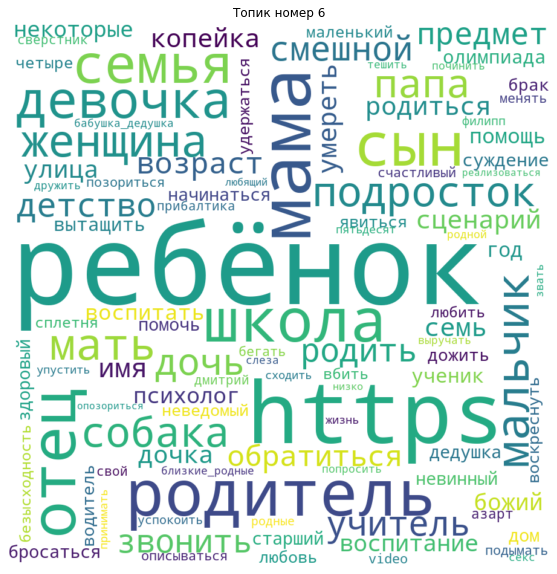

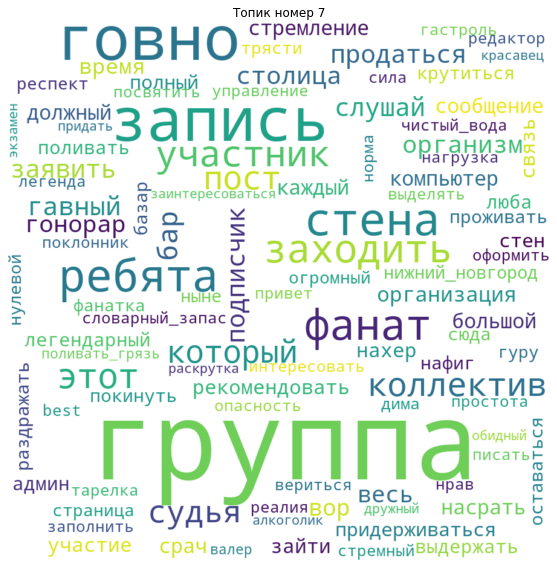

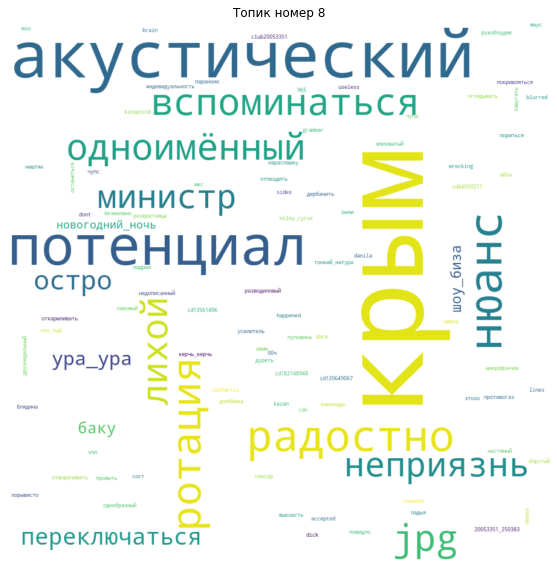

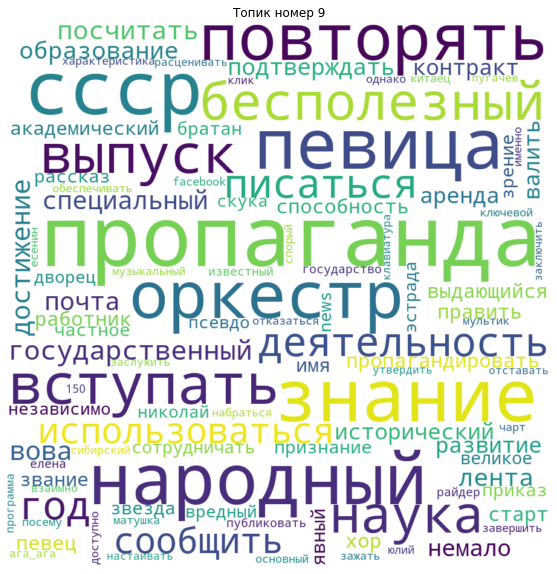

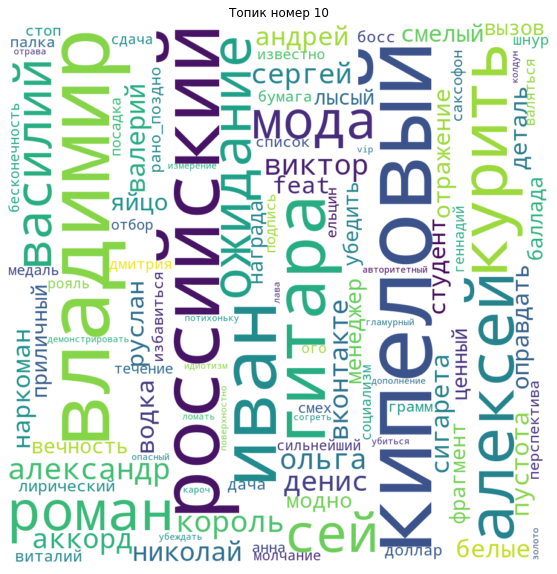

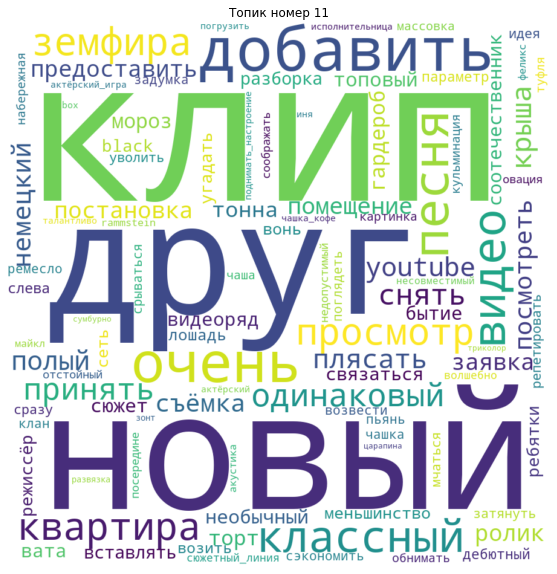

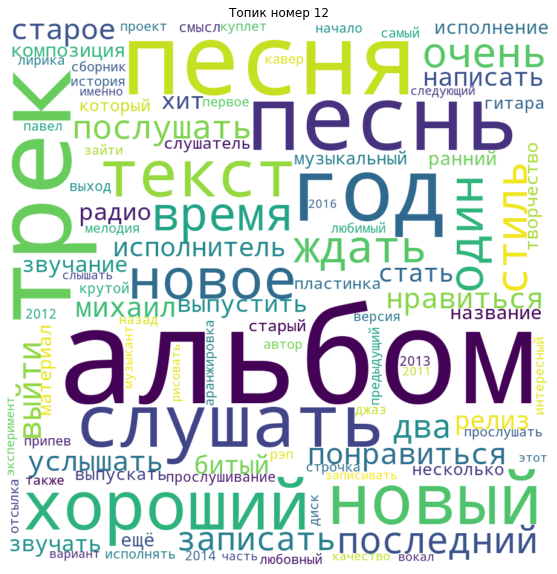

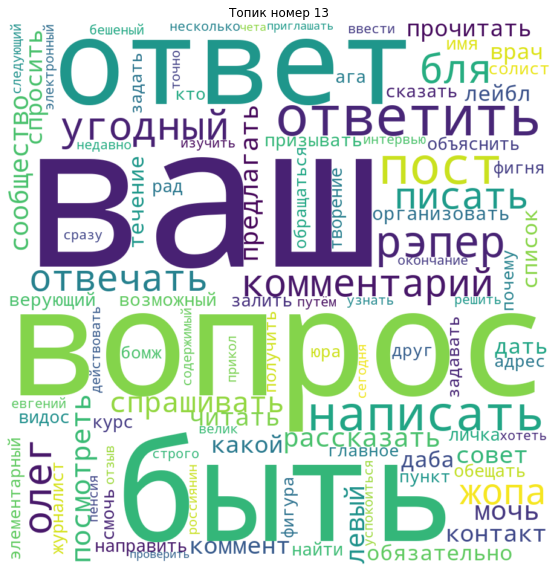

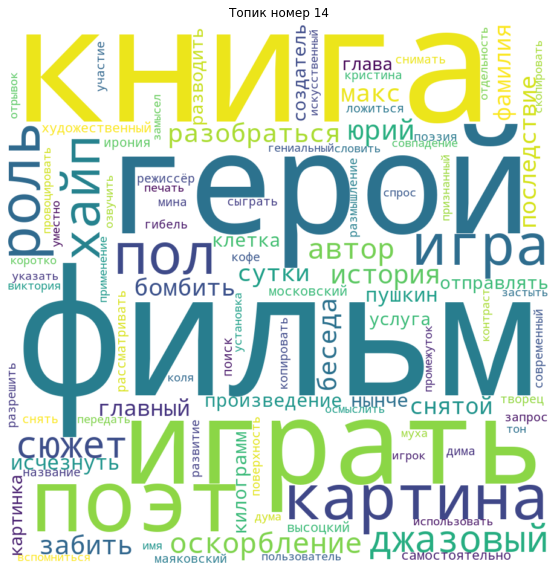

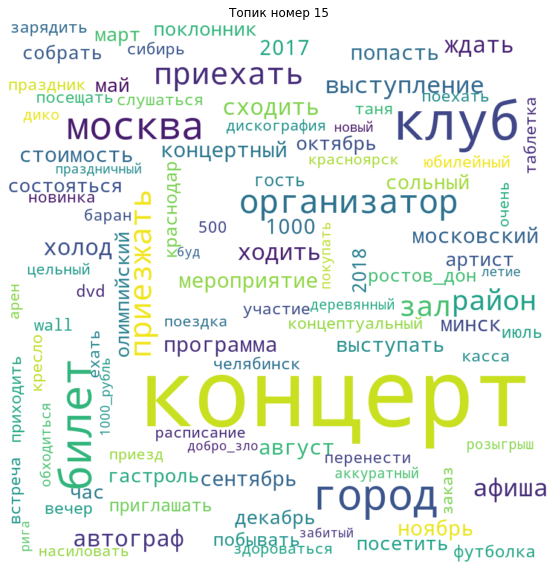

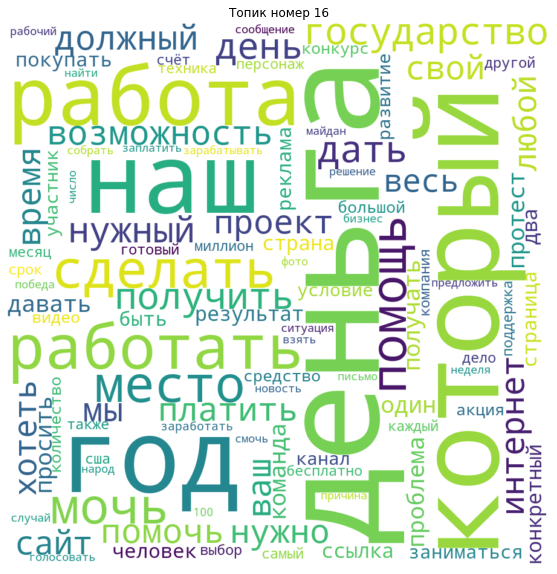

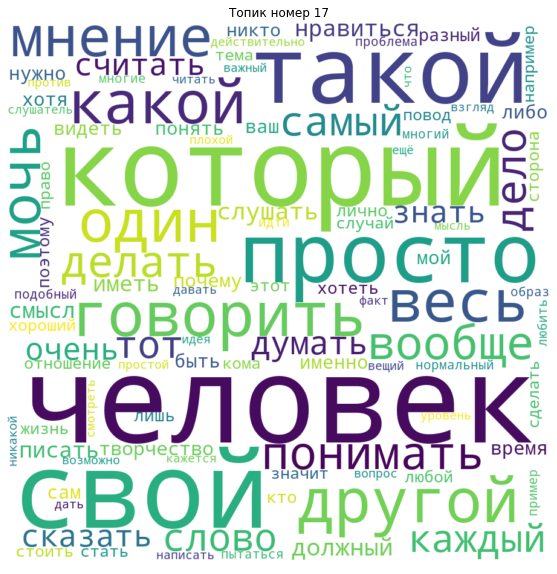

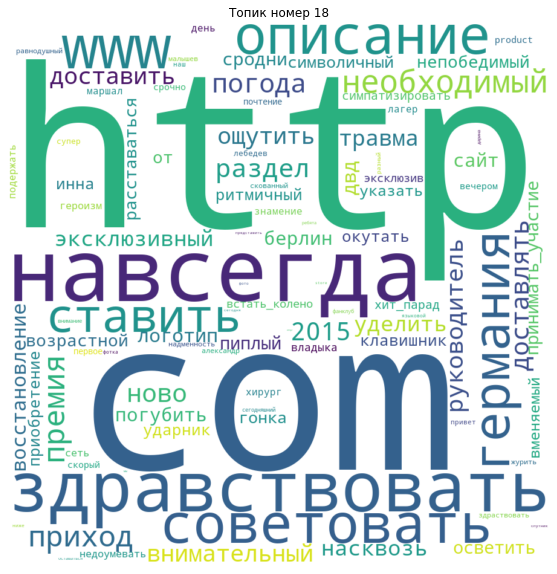

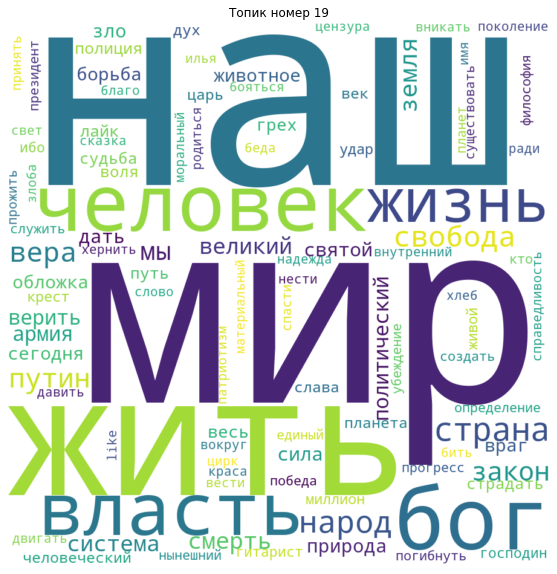

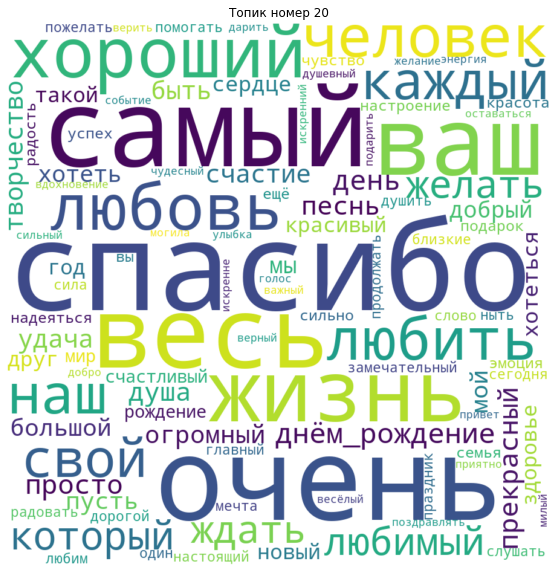

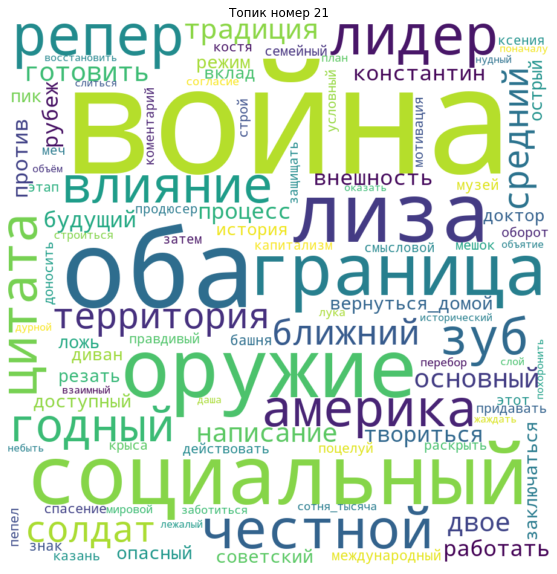

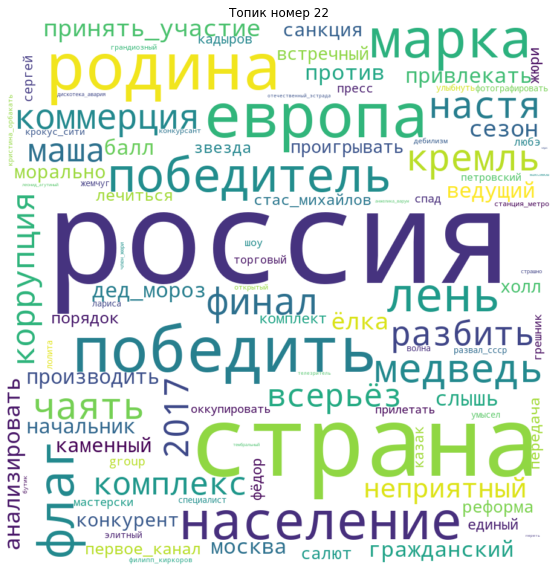

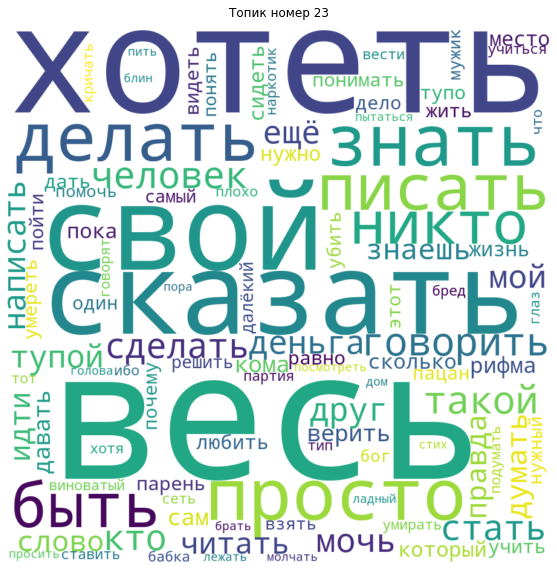

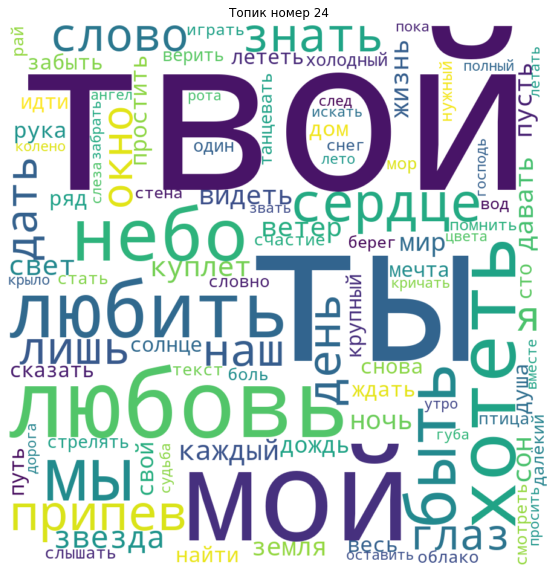

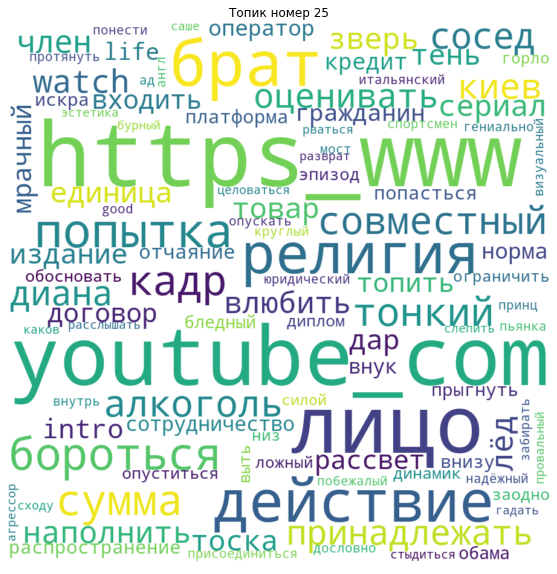

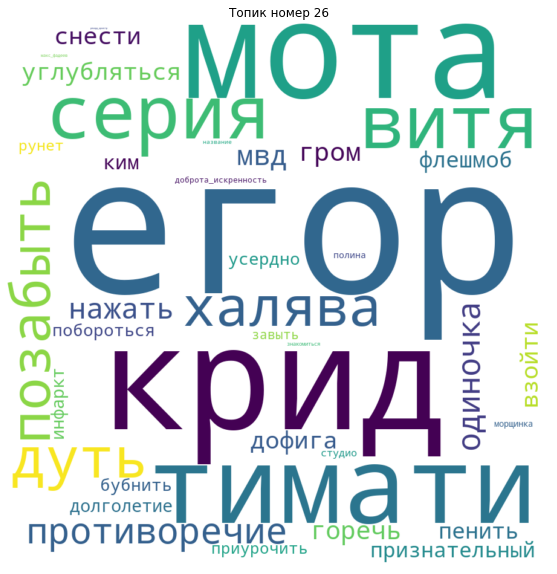

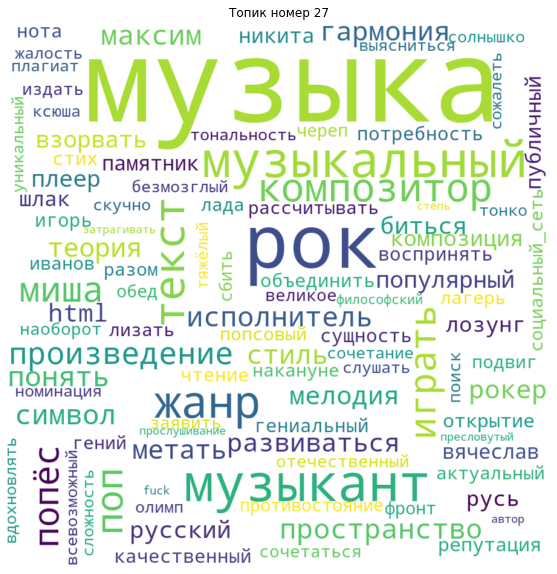

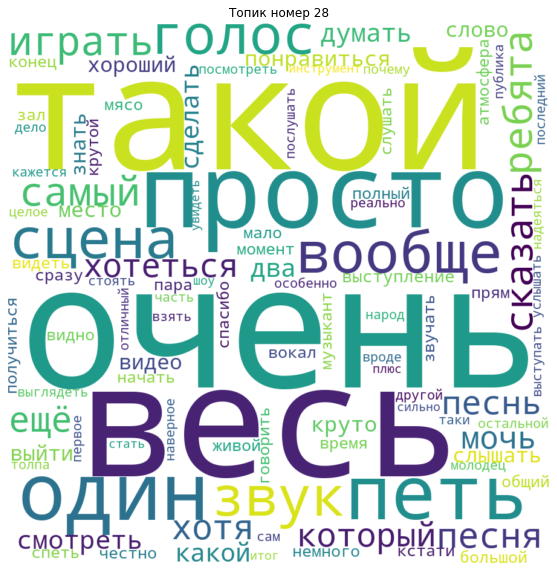

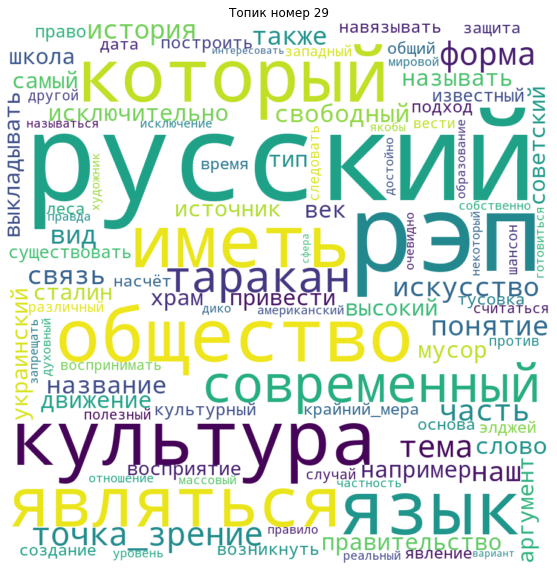

In [13]:
for i in range(30):
    plotWordCloud(topic_number=i)